<h1>Korte analyse van de data in 'mijn-kwik.experiments.json'.</h1>

Dit bestand bevat sdmt testresultaten in een Mongo-format. Ik heb dit bestand geïmporteerd in de collection 'experiments' in de 'test'database.

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
import pymongo
conn = pymongo.MongoClient()
conn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [8]:
db = conn['test']
experiments = db.experiments
data1 = experiments.find_one()

Om een beeld te krijgen van de data bekijk ik een willekeurig document in de collectie:

In [9]:
data1

{'_id': 'yvkJgxA8HouG8KLvA',
 'experiment': 'sdmt',
 'timestamp': datetime.datetime(2017, 1, 23, 11, 59, 17, 787000),
 'userId': 'gGSWzh5PnqgFdCpq4',
 'value': {'accelerometer': [{'timestamp': 1485172642679.0,
    'x': -9.829193115234375,
    'y': 0.309417724609375,
    'z': 1.3274688720703125},
   {'timestamp': 1485172667319.0,
    'x': -0.7554931640625,
    'y': 5.0199127197265625,
    'z': 8.365936279296875},
   {'timestamp': 1485172667454.0,
    'x': -0.6473541259765625,
    'y': 4.9647216796875,
    'z': 8.183837890625},
   {'timestamp': 1485172667521.0,
    'x': -0.5659637451171875,
    'y': 4.9311065673828125,
    'z': 8.337112426757812},
   {'timestamp': 1485172667655.0,
    'x': -0.7792816162109375,
    'y': 5.1253204345703125,
    'z': 8.154769897460938},
   {'timestamp': 1485172667722.0,
    'x': -0.7962493896484375,
    'y': 5.194793701171875,
    'z': 8.126205444335938},
   {'timestamp': 1485172667857.0,
    'x': -0.8582000732421875,
    'y': 5.206573486328125,
    'z': 8.

In [10]:
answers1 = data1['value']['answers']
#print(answers1)

Een user kan meerdere experimenten uitgevoerd hebben. Ik ben benieuwd naar het aantal users en het aantal experimenten per user:

In [11]:
userExps = experiments.aggregate(
    [{"$group":{"_id": "$userId", "count": {"$sum": 1} }}]
)
userCount = 0
experimentCount = 0
for user in userExps:
    userCount += 1
    experimentCount += user["count"]
    print(user)
print('Aantal users: ', userCount)
print('Aantal experimenten: ', experimentCount)

{'_id': 'HnnPaY8CNT5mjZ2yj', 'count': 234}
{'_id': 'kKT7kikinwwF6q4r3', 'count': 1}
{'_id': 'y7NnF95DP8RHB7Yiy', 'count': 1}
{'_id': 'YwBuqDX24P6y7c9E7', 'count': 1}
{'_id': 's5E5szF9aczSx3JWJ', 'count': 1}
{'_id': 'tsvua64vGPSuvEwBb', 'count': 1}
{'_id': 'S7Qezs8Xdsmp8SbFT', 'count': 6}
{'_id': 'osEMxzuhSfHaxMgeh', 'count': 1}
{'_id': 'sKMv8inBTveDxgyNe', 'count': 32}
{'_id': 'dcY9bRKm2efLaxboh', 'count': 1}
{'_id': 'M99Xt7fKsRzgXXubx', 'count': 1}
{'_id': 'n7JtBLvDv7sWemKC4', 'count': 10}
{'_id': 'caiEZ63Lw6s8vEbYw', 'count': 4}
{'_id': 'S2usWtx8WXPe8S88r', 'count': 45}
{'_id': 'jnaXZxsEbCwewbGko', 'count': 8}
{'_id': 'Zv9mMsTsphHFwEzFk', 'count': 4}
{'_id': 'GieLxKL9qoWpexRe6', 'count': 29}
{'_id': 'b59s7ZuFhuFesTRCa', 'count': 5}
{'_id': 'bc5LurabsLhmdYkhB', 'count': 16}
{'_id': '9HFSspNBYbDK6NwEi', 'count': 15}
{'_id': 'xuh6E5C9qECJbwjrX', 'count': 12}
{'_id': 'd3HEgEpQsn4WoSbaH', 'count': 10}
{'_id': 'xRRmiSbStm8DrTjdM', 'count': 4}
{'_id': 'qZhzn5ipMinXp9kyQ', 'count': 8}
{'_id'

Ik ben niet zo goed thuis in de sdmt test, maar als ik het goed begrijp wordt voor de score het aantal goede antwoorden dat in 90 seconden is gegeven genomen. Ik bekijk de scores en plot ze naar een histogram:

In [12]:
score = experiments.find(
    {"value.correct": {"$gt":0}},{"userId":1, "value.correct": 1}
)
nrCorrect = []
for result in score:
    if 'value' in result and 'correct' in result['value']:
        val = result['value']['correct']
        nrCorrect.append(val)
    
nrCorrect

[36,
 38,
 43,
 33,
 48,
 47,
 38,
 36,
 41,
 44,
 48,
 24,
 50,
 52,
 33,
 40,
 54,
 49,
 48,
 37,
 69,
 45,
 37,
 32,
 66,
 50,
 40,
 55,
 53,
 41,
 63,
 40,
 37,
 35,
 28,
 39,
 44,
 23,
 51,
 48,
 33,
 35,
 46,
 46,
 38,
 50,
 50,
 49,
 34,
 50,
 15,
 52,
 39,
 45,
 65,
 34,
 42,
 49,
 37,
 45,
 35,
 29,
 40,
 36,
 45,
 45,
 35,
 51,
 37,
 52,
 47,
 46,
 34,
 45,
 30,
 48,
 32,
 40,
 50,
 38,
 38,
 37,
 41,
 31,
 48,
 61,
 43,
 43,
 30,
 35,
 36,
 45,
 37,
 27,
 36,
 39,
 28,
 42,
 37,
 32,
 27,
 45,
 28,
 37,
 34,
 41,
 32,
 14,
 46,
 51,
 32,
 41,
 44,
 37,
 36,
 43,
 46,
 36,
 29,
 38,
 33,
 36,
 51,
 42,
 38,
 38,
 51,
 41,
 37,
 26,
 26,
 40,
 39,
 49,
 38,
 31,
 36,
 47,
 45,
 53,
 32,
 51,
 21,
 25,
 35,
 32,
 27,
 41,
 47,
 11,
 42,
 38,
 31,
 34,
 16,
 30,
 47,
 35,
 34,
 26,
 35,
 48,
 37,
 38,
 38,
 39,
 47,
 34,
 44,
 37,
 35,
 29,
 41,
 39,
 43,
 37,
 34,
 45,
 40,
 37,
 34,
 30,
 33,
 35,
 39,
 39,
 37,
 38,
 41,
 37,
 29,
 39,
 30,
 36,
 1,
 38,
 42,
 36,
 38,
 36,
 

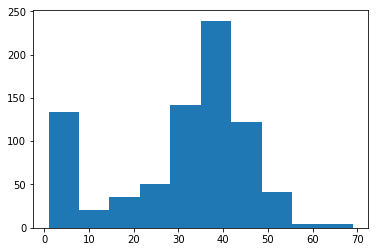

In [13]:
plt.hist(nrCorrect)
plt.show()

In [14]:
max(nrCorrect)

69

In [15]:
np.median(nrCorrect)

35.0

Opvallend is de piek in de lage scores (0-5). Omdat ik de herkomst van de data niet ken, is het mij niet duidelijk of dit te wijten is aan niet serieus uitgevoerde of vroegtijdig onderbroken tests of dat dit duidt op een relatief grote groep users/experimenten die zeer laag scoren (ivm ziekteverschijnselen)

In [18]:
for exp in experiments.find({"value.correct": {"$lt":5}},{"value.answers":1, "userId": 1}):
    print(exp['userId'])
    if 'value' in exp and 'answers' in exp['value']:
        for a in exp['value']['answers']:
            print(a)
        print('---')

GieLxKL9qoWpexRe6
---
GieLxKL9qoWpexRe6
{'symbol': 'inf', 'number': 2, 'correct': False, 'timestamp': datetime.datetime(2016, 11, 21, 15, 30, 14, 295000)}
{'symbol': 'triangle', 'number': 4, 'correct': True, 'timestamp': datetime.datetime(2016, 11, 21, 15, 30, 15, 77000)}
{'symbol': 'plus', 'number': 6, 'correct': False, 'timestamp': datetime.datetime(2016, 11, 21, 15, 30, 15, 259000)}
{'symbol': 'hamburger', 'number': 2, 'correct': False, 'timestamp': datetime.datetime(2016, 11, 21, 15, 30, 15, 359000)}
{'symbol': 'window', 'number': 3, 'correct': False, 'timestamp': datetime.datetime(2016, 11, 21, 15, 30, 15, 598000)}
{'symbol': 'inf', 'number': 4, 'correct': False, 'timestamp': datetime.datetime(2016, 11, 21, 15, 30, 15, 707000)}
{'symbol': 'square', 'number': 6, 'correct': False, 'timestamp': datetime.datetime(2016, 11, 21, 15, 30, 15, 991000)}
{'symbol': 'inf', 'number': 4, 'correct': False, 'timestamp': datetime.datetime(2016, 11, 21, 15, 30, 16, 90000)}
---
jnaXZxsEbCwewbGko
---

<h2>Conclusie</h2>

Ik kan op dit moment nog geen goede conclusie trekken. Ik zou hiervoor meer moeten weten over de herkomst van de data en over de users. Maar zou ook meer inhoudelijke kennis over de sdmt test moeten hebben en wat er uit onderzoeken bekend is over de scores.

<h3>Voorlopige conclusie</h3>

Voor de data in het spindiagram lijkt me dat een percentielscore eigenlijk het meest communicatief en intuïtief zou zijn, zeker als dit voor alle tests/scores mogelijk zou zijn. Dit zou echter wel ten opzichte van een vaste referentie-dataset moeten zijn, zodat eerdere waarden niet meer kunnen verschuiven wat vergelijking in de tijd moeilijker zou maken. De kwaliteit van deze dataset lijkt me onvoldoende om hiervoor als referentie te dienen.

Ik kies voorlopig voor een eenvoudigere oplossing. Om wel vast te houden aan een gevoelsmatig logische samenhang dat een waarde halverwege de as een 'gemiddelde score' betreft en omdat ik niet goed raad weet met de sub-piek voor de scores onder de 5, kies ik voor de mediaan als middelste waarde op de as. Omdat 0 het absolute minimum is van de test en omdat de maximum-score in deze dataset 69 is en de mediaan 35, komen we mooi weg met een lineaire as met een domein van 0 tot 70. Waarbij we wel het risico lopen op waarden die boven het maximum uitkomen, maar voor deze voorlopige conclusie nemen we dat voor lief (maar gaan wel even het component testen met deze te hoge waarden).